In [126]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

folder = os.path.join(os.getcwd(),"data","231221-001")

id = "2"
step = 1

name = f"{id}.{step}"

filename = os.path.join(folder,f"{name}.csv")
frame = pd.read_csv(filename)

x = frame['step'].to_numpy()
y = frame['blur'].to_numpy()

w = 50
s = np.lib.stride_tricks.sliding_window_view(y, window_shape=w)

f = np.array([np.polyfit(range(w), s[j,], 1) for j in range(s.shape[0])]).ravel().reshape(-1,2)

m = f[:,0]
b = f[:,1]


i = np.argwhere(np.abs(m) >.01)
m = m[i]
b = b[i]

l = len(i)
x = range(l)

y_ = m*w+b

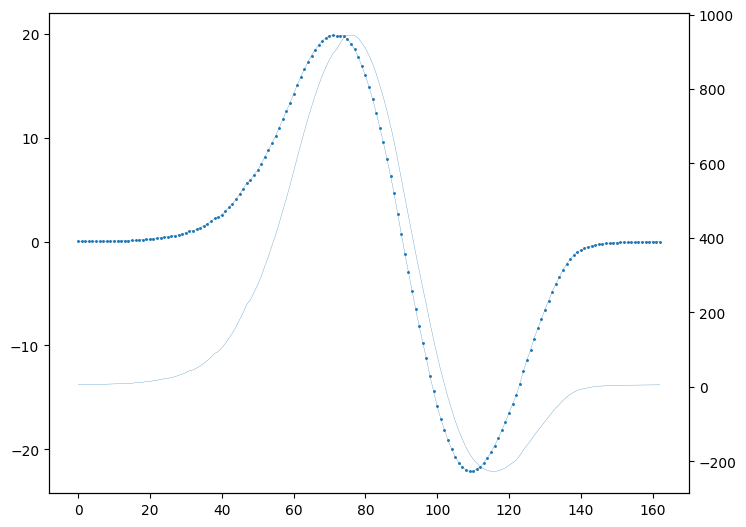

In [127]:

dpi = 100

plt.rcParams["figure.dpi"] = dpi

fig = plt.figure(frameon=True)

ax = plt.Axes(fig, [0.,0.,1.,1.])

facecolor = 'white'
color = 'black'
textcolor ='gray'

ax.set_axis_on()
ax.set_facecolor('white')

fig.add_axes(ax)

ax.plot(x,m,"o-",ms=1.1,lw=0.2,label=f"{name}.{w}")

ax2 = ax.twinx()
ax2.plot(x,y_,"-",ms=1.1,lw=0.2,label=f"{name}.{w}")


#plt.legend()
plt.show()
plt.close()